# Was there a Sattelzeit?

In [1]:
from ipynb.fs.full.koselleck import *

In [3]:
c=lltk.load('Chadwyck')
c.meta[c.meta.title.str.lower().str.contains('history')].sort_values('year')

,author,title,year,idref,pub,type,name,nation,medium,subcorpus,fn_raw,year_orig,path_freqs,path_txt,path_xml,_year_orig,corpus
id,,,,,,,,,,,,,,,,,
Early_English_Prose_Fiction/ee10010.02,"Behn, Aphra, 1640-1689",The History of the Nun (1689),1689.0,Z200025210,Printed for A. Baskervile [etc.],BOOK,Title Page,British,Fiction,Early_English_Prose_Fiction,Early_English_Prose_Fiction/ee10010.02.new,1689,/home/ryan/lltk_data/corpora/chadwyck/freqs/Early_English_Prose_Fiction/ee10010.02.json,/home/ryan/lltk_data/corpora/chadwyck/txt/Early_English_Prose_Fiction/ee10010.02.txt,/home/ryan/lltk_data/corpora/chadwyck/xml/Early_English_Prose_Fiction/ee10010.02.xml,1689,Chadwyck
Eighteenth-Century_Fiction/sheridan.02,"Sheridan, Frances Chamberlaine, 1724-1766",The History of Nourjahad (1767),1767.0,Z200046333,Printed for J. Dodsley in Pall&hyphen;Mall,BOOK,Title Page,British,Fiction,Eighteenth-Century_Fiction,Eighteenth-Century_Fiction/sheridan.02.new,1767,/home/ryan/lltk_data/corpora/chadwyck/freqs/Eighteenth-Century_Fiction/sheridan.02.json,/home/ryan/lltk_data/corpora/chadwyck/txt/Eighteenth-Century_Fiction/sheridan.02.txt,/home/ryan/lltk_data/corpora/chadwyck/xml/Eighteenth-Century_Fiction/sheridan.02.xml,1767,Chadwyck
Eighteenth-Century_Fiction/smollett.01,"Smollett, Tobias George, 1721-1771",The History and Adventures of an Atom (1769),1769.0,Z200046363,Printed for Robinson and Roberts [etc.],BOOK,Vol. 1,British,Fiction,Eighteenth-Century_Fiction,Eighteenth-Century_Fiction/smollett.01.new,1769,/home/ryan/lltk_data/corpora/chadwyck/freqs/Eighteenth-Century_Fiction/smollett.01.json,/home/ryan/lltk_data/corpora/chadwyck/txt/Eighteenth-Century_Fiction/smollett.01.txt,/home/ryan/lltk_data/corpora/chadwyck/xml/Eighteenth-Century_Fiction/smollett.01.xml,1769,Chadwyck
Early_American_Fiction/belknapj.01,"Belknap, Jeremy, 1744-1798","The Foresters, an American Tale: Being a Sequel to the History of John Bull the Clothier. In a Series of Letters to a Friend (1792)",1792.0,Z100001255,I. Thomas &amp; E. T. Andrews,BOOK,"<mainhead>The Foresters, an American Tale: Being a Sequel to the History of John Bull the Clothier. In a Series of Letters to a Friend</mainhead>",American,Fiction,Early_American_Fiction,Early_American_Fiction/belknapj.01.new,1792,/home/ryan/lltk_data/corpora/chadwyck/freqs/Early_American_Fiction/belknapj.01.json,/home/ryan/lltk_data/corpora/chadwyck/txt/Early_American_Fiction/belknapj.01.txt,/home/ryan/lltk_data/corpora/chadwyck/xml/Early_American_Fiction/belknapj.01.xml,1792,Chadwyck
Early_American_Fiction/fosterha.02,"Foster, Hannah (Webster), 1759-1840","The Coquette; or, The History of Eliza Wharton. A Novel, Founded on Fact. By a Lady of Massachussetts (1797)",1797.0,Z100006731,Samuel Etheridge,BOOK,"<mainhead>The Coquette; or, The History of Eliza Wharton. A Novel, Founded on Fact. By a Lady of Massachussetts</mainhead>",American,Fiction,Early_American_Fiction,Early_American_Fiction/fosterha.02.new,1797,/home/ryan/lltk_data/corpora/chadwyck/freqs/Early_American_Fiction/fosterha.02.json,/home/ryan/lltk_data/corpora/chadwyck/txt/Early_American_Fiction/fosterha.02.txt,/home/ryan/lltk_data/corpora/chadwyck/xml/Early_American_Fiction/fosterha.02.xml,1797,Chadwyck
Early_American_Fiction/irvingwa.06,"Irving, Washington, 1783-1859","A History of New York, from the Beginning of the World to the End of the Dutch Dynasty, Volume 2 . . . By Diedrich Knickerbocker [pseud] (1809)",1809.0,Z100011019,Inskeep &amp; Bradford,BOOK,"<mainhead>A History of New York, from the Beginning of the World to the End of the Dutch Dynasty, Volume 2 . . . By Diedrich Knickerbocker [pseud]</mainhead>",American,Fiction,Early_American_Fiction,Early_American_Fiction/irvingwa.06.new,1809,/home/ryan/lltk_data/corpora/chadwyck/freqs/Early_American_Fiction/irvingwa.06.json,/home/ryan/lltk_data/corpora/chadwyck/txt/Early_American_Fiction/irvingwa.06.txt,/home/ryan/lltk_data/corpora/chadwyck/xml/Early_American_Fiction/irvingwa.06.xml,1809,Chadwyck
Early_American_Ficti

,author,title,year,NumericPubDate,RecordID,Publication_PublicationID,Publication_Title,Publication_Qualifier,Publisher,VolumeIssue,...,ObjectType,ISSN,LanguageCode,SourceType,num_words,path_freqs,path_txt,path_xml,_year_orig,corpus
id,,,,,,,,,,,,,,,,,,,,,
1694/Review/2949,,"The Secret History of Burgundy,in 2 Vol.in 12. Paris, 1694.",1694,16941017,5859217,2949,Miscellaneous letters : giving an account of the works of the learned,London,William Lindsey,,...,Review,2043-4448,ENG,Historical Periodicals,704,/home/ryan/lltk_data/corpora/bpo/freqs/1694/Review/2949.json,/home/ryan/lltk_data/corpora/bpo/txt/1694/Review/2949.txt,/home/ryan/lltk_data/corpora/bpo/xml/1694/Review/2949.xml,1694,BPO
1701/Correspondence/2988,,"An Extract of a Letter, containing a secret Passage, in the History of Gustavus Adolphus, King of Sweden.",1701,17010101,6094614,2988,"Memoirs for the curious, or, An account of what occurs that's rare, secret, extraordinary, prodiguous or miraculous",London,A. Baldwin,,...,Correspondence,2043-4324,ENG,Historical Periodicals,464,/home/ryan/lltk_data/corpora/bpo/freqs/1701/Correspondence/2988.json,/home/ryan/lltk_data/corpora/bpo/txt/1701/Correspondence/2988.txt,/home/ryan/lltk_data/corpora/bpo/xml/1701/Correspondence/2988.xml,1701,BPO
1707/General_Information/2953,,XXIV. Natural History of Jamaica.,1707,17070101,5830551,2953,"Monthly miscellany, or, Memoirs for the curious",London,J. Morphew,,...,General Information,2043-4545,ENG,Historical Periodicals,3021,/home/ryan/lltk_data/corpora/bpo/freqs/1707/General_Information/2953.json,/home/ryan/lltk_data/corpora/bpo/txt/1707/General_Information/2953.txt,/home/ryan/lltk_data/corpora/bpo/xml/1707/General_Information/2953.xml,1707,BPO
1709/Review/2953,,History of Surinam Insects.,1709,17090101,5857209,2953,"Monthly miscellany, or, Memoirs for the curious",London,J. Morphew,,...,Review,2043-4545,ENG,Historical Periodicals,541,/home/ryan/lltk_data/corpora/bpo/freqs/1709/Review/2953.json,/home/ryan/lltk_data/corpora/bpo/txt/1709/Review/2953.txt,/home/ryan/lltk_data/corpora/bpo/xml/1709/Review/2953.xml,1709,BPO
1711/Review/2801,,"Some Dialogues upon several Subjects relating to History, Literature, Religion, and Critick.",1711,17110108,6040990,2801,"Memoirs of literature, 1710-1714",London,M. de la Roche,,...,Review,,ENG,Historical Periodicals,4288,/home/ryan/lltk_data/corpora/bpo/freqs/1711/Review/2801.json,/home/ryan/lltk_data/corpora/bpo/txt/1711/Review/2801.txt,/home/ryan/lltk_data/corpora/bpo/xml/1711/Review/2801.xml,1711,BPO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1921/Correspondence/2299,,&quot;A SHORT HISTORY OF THE BRITISH COMMONWEALTH&quot;,1921,19210107,9145039,2299,The Athenaeum,London,"J. Frances, etc.",,...,Correspondence,1747-3594,ENG,Historical Periodicals,382,/home/ryan/lltk_data/corpora/bpo/freqs/1921/Correspondence/2299.json,/home/ryan/lltk_data/corpora/bpo/txt/1921/Correspondence/2299.txt,/home/ryan/lltk_data/corpora/bpo/xml/1921/Correspondence/2299.xml,1921,BPO
1922/Fiction/581,,The History of the MoulinRouge,1922,19220101,2443145,581,"The English review, 1908-1937",London,The English Review Ltd etc.,,...,Fiction,2043-2275,ENG,Historical Periodicals,2901,/home/ryan/lltk_data/corpora/bpo/freqs/1922/Fiction/581.json,/home/ryan/lltk_data/corpora/bpo/txt/1922/Fiction/581.txt,/home/ryan/lltk_data/corpora/bpo/xml/1922/Fiction/581.xml,1922,BPO
1929/News/1434,,From &quot;A HISTORY OF BRITISH AND AMERICAN ETCHING&quot;,1929,19291001,3233236,1434,The Bookman,London,Hodder and Stoughton,,...,News,2043-1503,ENG,Historical Periodicals,12,/home/ryan/lltk_data/corpora/bpo/freqs/1929/News/1434.json,/home/ryan/lltk_data/corpora/bpo/txt/1929/News/1434.txt,/home/ryan/lltk_data/corpora/bpo/xml/1929/News/1434.xml,1929,BPO


In [45]:
MINFOOTENOW=3
MAXFOOTENOW=6

In [47]:
# get_signif_novelty_scores??

In [48]:
dfsignsum=get_signif_novelty_scores_summary(min_foote_size=MINFOOTENOW,max_foote_size=MAXFOOTENOW)
dfsign=get_signif_novelty_scores(min_foote_size=MINFOOTENOW,max_foote_size=MAXFOOTENOW)
# dfsignsum.changepoint.plot.density()

In [50]:
get_all_novelty_scores()

,word,period,foote_novelty,foote_size,p_peak,p_trough,foote_novelty_z,period_str,is_signif,period_int
310877,shopkeeper,1810,-0.407635,5,1.0,0.99,-2.081623,1810-1815,False,1810
277140,caverns,1795,-0.262609,5,1.0,0.99,-1.891842,1795-1800,False,1795
123582,sorrows,1800,-0.158407,5,1.0,0.99,-1.755485,1800-1805,False,1800
324050,dissertations,1840,-0.152773,5,1.0,0.99,-1.748113,1840-1845,False,1840
59378,assist,1825,-0.126250,5,1.0,0.99,-1.713404,1825-1830,False,1825
...,...,...,...,...,...,...,...,...,...,...
158396,foil,1815,13.622346,5,0.0,1.00,16.277845,1815-1820,True,1815
66413,crystal,1850,13.755975,5,0.0,1.00,16.452709,1850-1855,True,1850
4461,cloth,1830,14.414710,5,0.0,1.00,17.314722,1830-1835,True,1830
242786,fins,1815,14.552565,5,0.0,1.00,17.495118,1815-1820,True,1815


In [57]:
# get_signif_novelty_scores??

In [62]:

def make_figdf(dfsign,dtype='signif_word',rolling_n=1):
    l=[]
    for i,dfsign_fs in dfsign.groupby('foote_size'):
        odf=pd.DataFrame(
            grp.assign(num_peaks=len(grp)).mean()
            for i,grp in dfsign_fs.groupby('period')
        )
        odf['num_peaks_rel']=odf.num_peaks / odf.num_peaks.max()
        odf=odf.rolling(rolling_n,min_periods=1).mean().assign(dtype=dtype)
        odf['foote_size']=str(int(i))#f'FS{int(i)}'
        l+=[odf]
    return pd.concat(l) if len(l) else pd.DataFrame()

def is_safe_fs(w):
    return not ('s' in w or 'f' in w)

# dfsignsum_safe=dfsignsum[[is_safe_fs(w) for w in dfsignsum.index]]
# dfsign_safe=dfsign[[is_safe_fs(w) for w in dfsign.word]]

# figdf1=make_figdf(dfsign,dtype='peak').assign(fs='fs')
# figdf2=make_figdf(dfsignsum,dtype='word').assign(fs='fs')
# figdf3=make_figdf(dfsign_safe,dtype='peak').assign(fs='no-fs')
# figdf4=make_figdf(dfsignsum_safe,dtype='word').assign(fs='no-fs')
# figdf=pd.concat([figdf1])#,figdf2])#,figdf3,figdf4])
# figdf=figdf[figdf.dtype.str.startswith('peak')]
# figdf


figdf=pd.concat([
    make_figdf(
        get_signif_novelty_scores(
            min_foote_size=MINFOOTENOW,max_foote_size=MAXFOOTENOW,
            p_peak=0.01
        )
    ).assign(dtype2='Signif (strict).'),
    
    make_figdf(
        get_signif_novelty_scores(
            min_foote_size=MINFOOTENOW,max_foote_size=MAXFOOTENOW,
            p_peak=0.05,consecutive_peaks=False,min_periods=1
        )
    ).assign(dtype2='Signif (lax)'),
    
])
figdf

100%|██████████| 18411/18411 [00:12<00:00, 1460.09it/s]


,period,foote_novelty,foote_size,p_peak,p_trough,foote_novelty_z,is_signif,period_int,word_num_peaks,num_peaks,num_peaks_rel,dtype,dtype2
0,1735.0,1.533256,3,0.000000,1.0,3.180559,1.0,1735.0,2.000000,2.0,0.044444,signif_word,Signif (strict).
1,1740.0,1.173009,3,0.004000,1.0,2.083404,1.0,1740.0,2.000000,5.0,0.111111,signif_word,Signif (strict).
2,1745.0,1.756023,3,0.002759,1.0,3.859009,1.0,1745.0,2.000000,29.0,0.644444,signif_word,Signif (strict).
3,1750.0,1.774846,3,0.003111,1.0,3.916336,1.0,1750.0,2.000000,45.0,1.000000,signif_word,Signif (strict).
4,1755.0,1.915687,3,0.001000,1.0,4.345275,1.0,1755.0,2.000000,20.0,0.444444,signif_word,Signif (strict).
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,1845.0,5.446957,6,0.012328,1.0,3.320807,1.0,1845.0,3.354497,189.0,0.178808,signif_word,Signif (lax)
20,1850.0,5.368645,6,0.010599,1.0,3.250756,1.0,1850.0,3.173653,167.0,0.157994,signif_word,Signif (lax)
21,1855.0,5.311099,6,0.011625,1.0,3.199278,1.0,1855.0,3.050000,160.0,0.151372,signif_word,Signif (lax)
22,1860.0,5.421824,6,0.010066,1.0,3.298325,1.0,1860.0,2.887417,151.0,0.142857,signif_word,Signif (lax)


In [76]:
def plot_nov_signif(figdf, y='num_peaks',save=False):
    p9.options.dpi=300
    nudge_x=2
    ymin=-50
    labsize=6

    fig=start_fig(
        figdf,
        x='period',
        y=y,
    #     linetype='foote_size',
        shape='foote_size',
        figure_size=(8,8)
    ) + p9.geom_point(size=1.5)
    fig+=p9.geom_smooth(method='loess',alpha=.2,span=.4, size=.5)
    fig+=p9.geom_vline(xintercept=1770,linetype='dotted',alpha=0.5) 
    fig+=p9.geom_vline(xintercept=1800,linetype='dotted',alpha=0.5) 
    fig+=p9.geom_vline(xintercept=1830,linetype='dotted',alpha=0.5) 
    fig+=p9.geom_label(label='Sattelzeit begins (1770)',x=1770+nudge_x,y=ymin,angle=90,size=labsize,color='black',va='bottom',boxcolor=(0,0,0,0))
    fig+=p9.geom_label(label='Sattelzeit ends (1830)',x=1830+nudge_x,y=ymin,angle=90,size=labsize,color='black',va='bottom',boxcolor=(0,0,0,0)) 

    fig+=p9.facet_wrap('dtype2',ncol=1)
    if save: fig.save(f'../figures/fig.nov_summary.{y}.v2.png')
    return fig

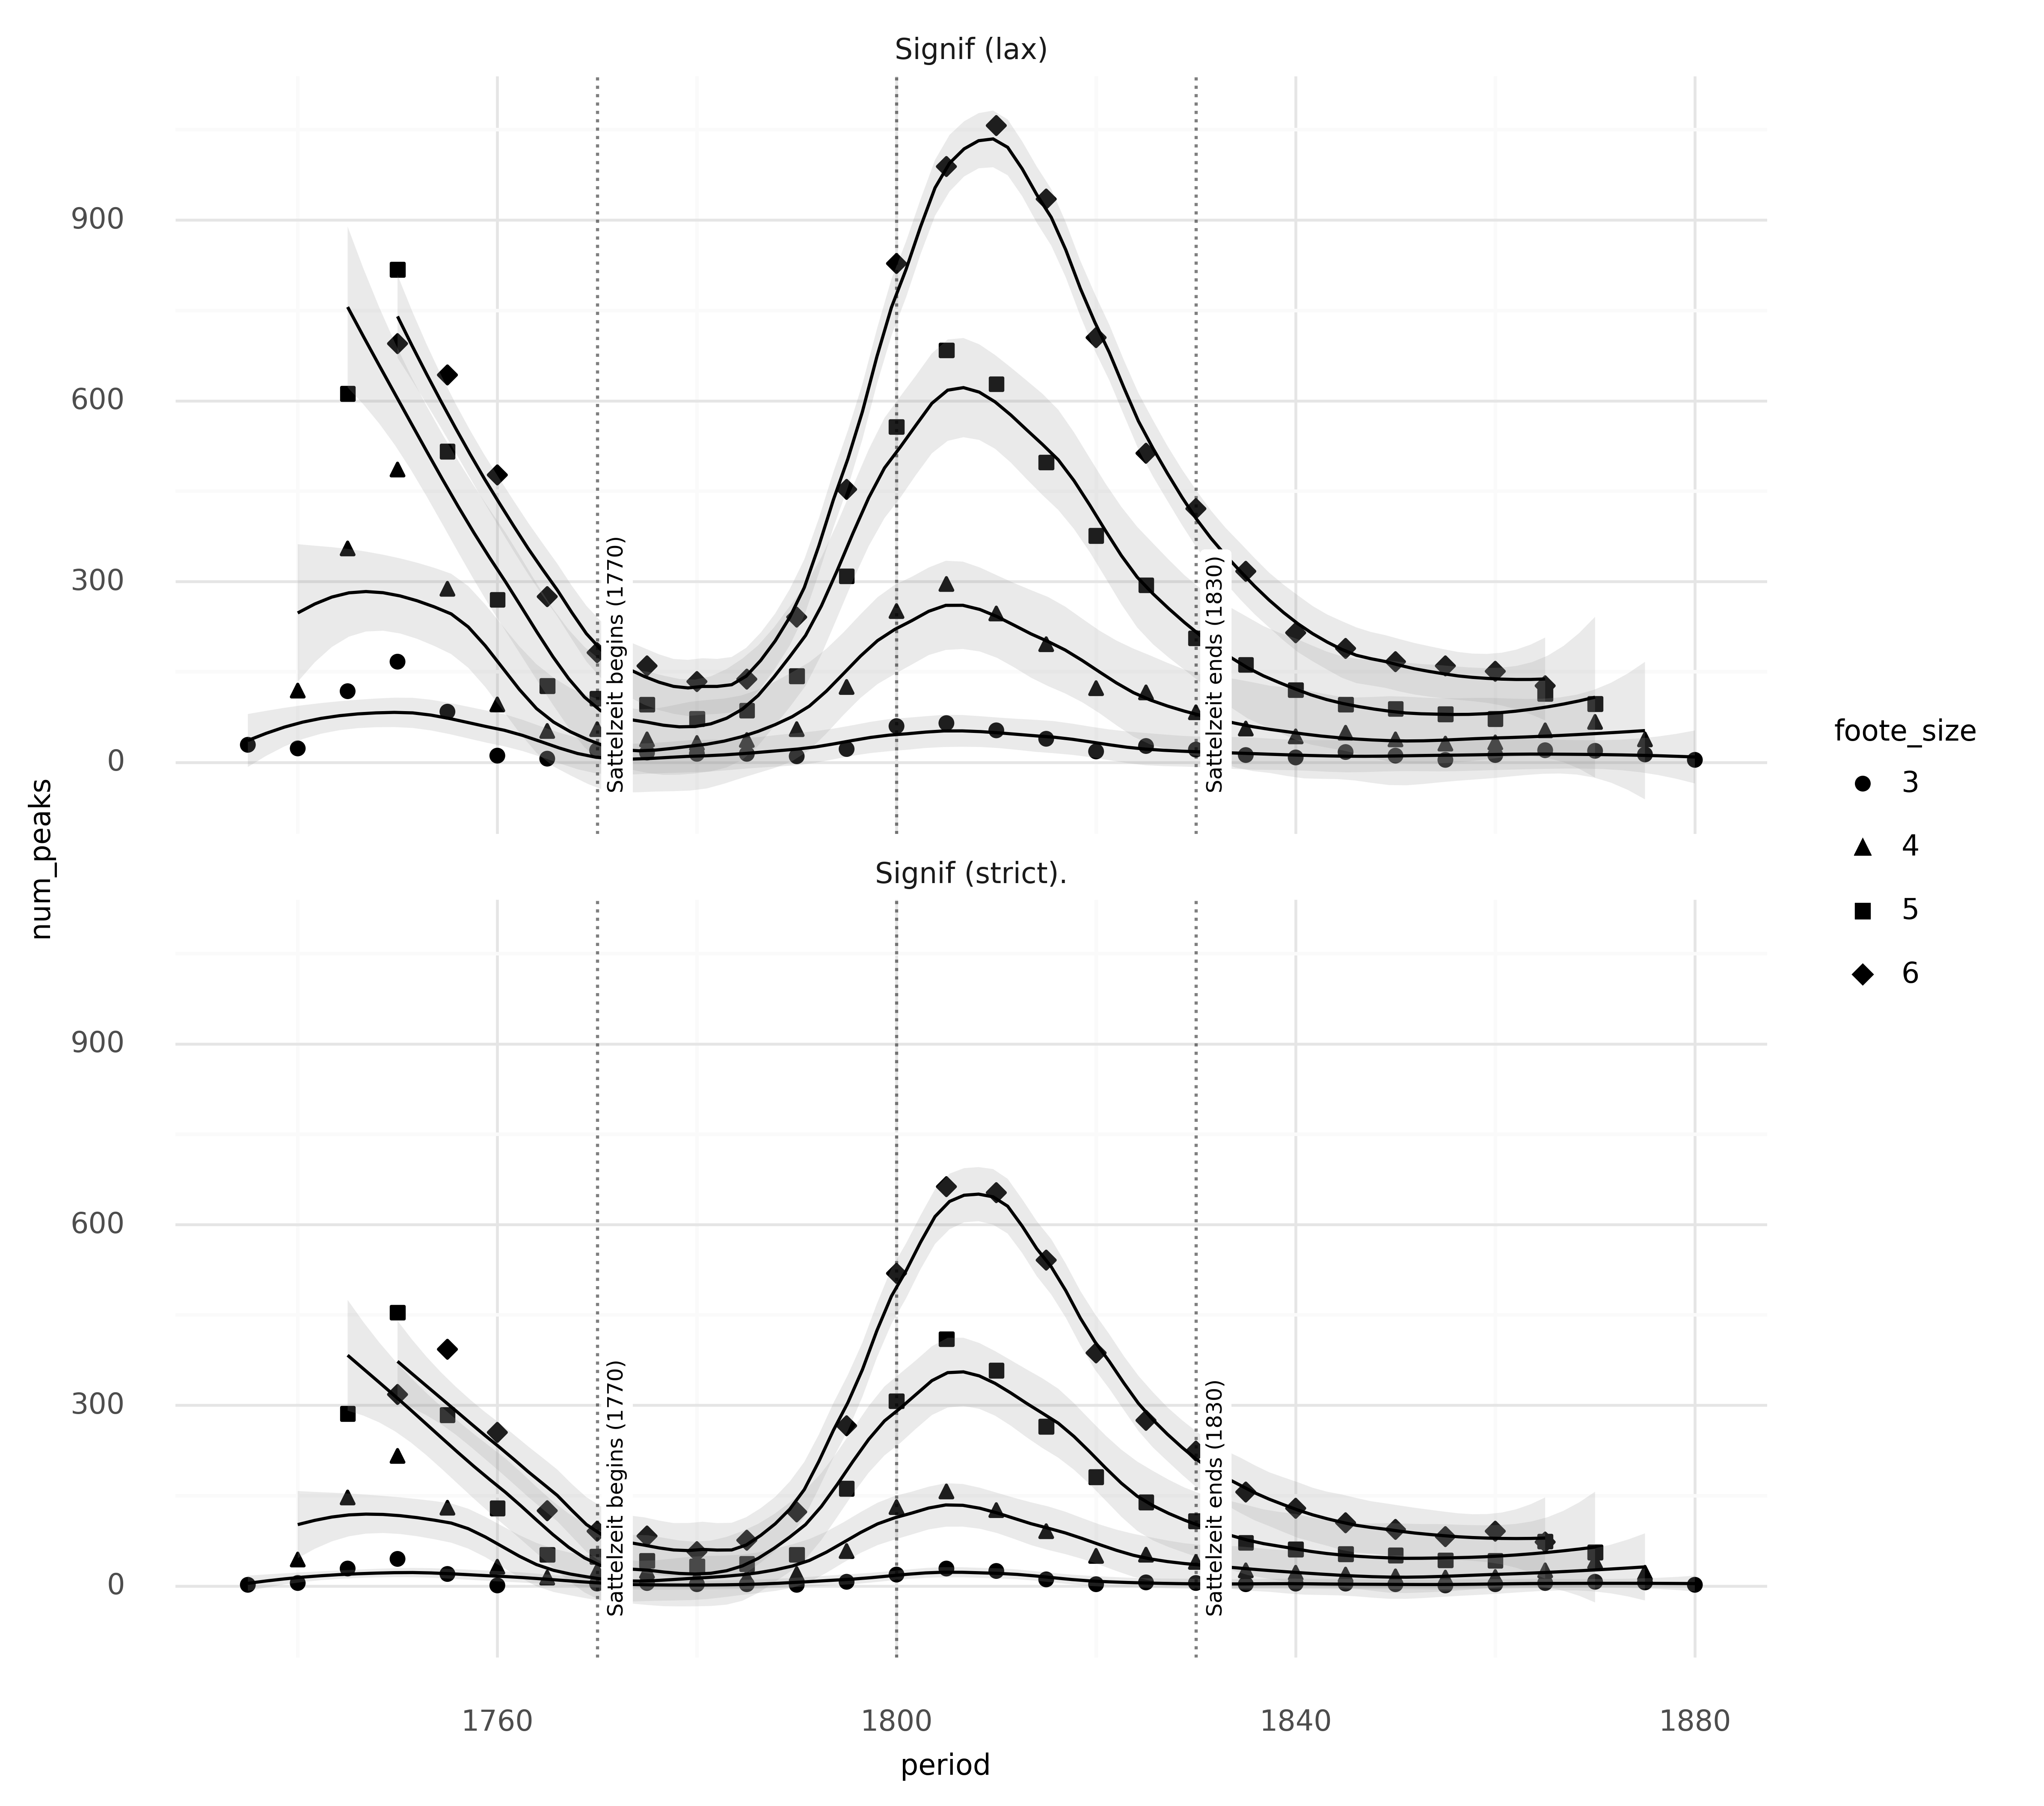

<ggplot: (8782742709387)>

In [77]:
plot_nov_signif(figdf, y='num_peaks', save=True)

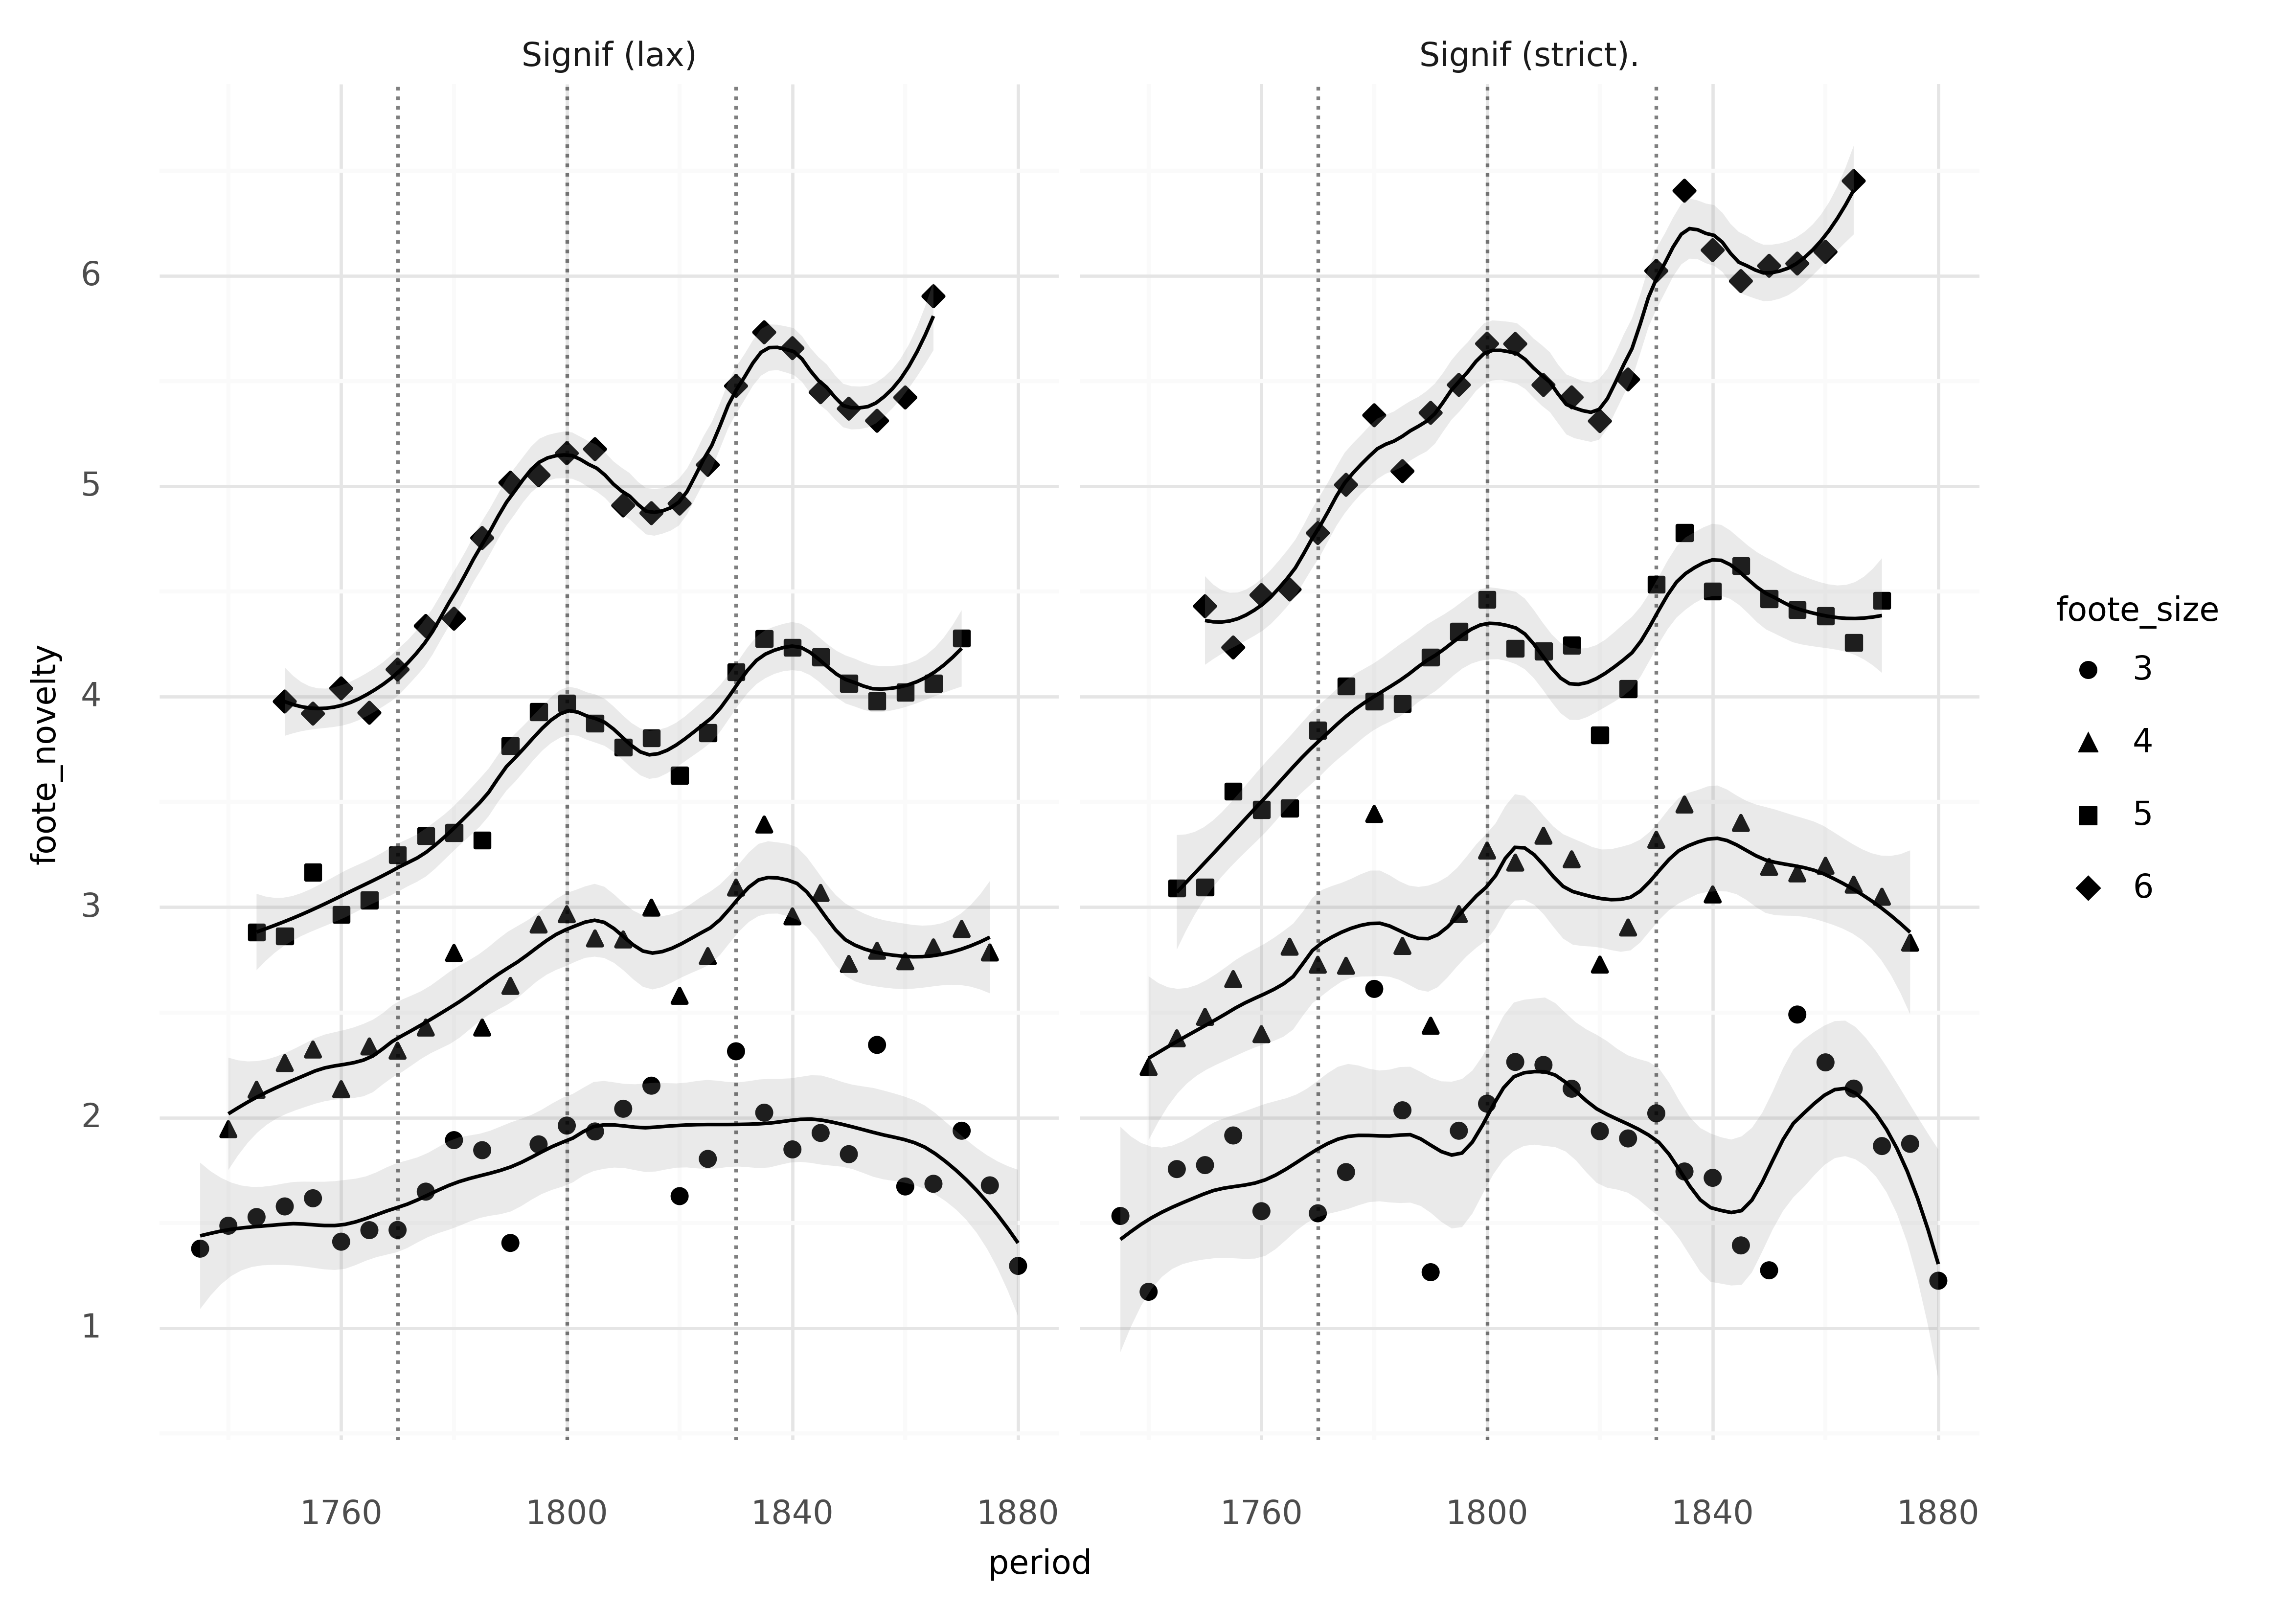

<ggplot: (8782729626829)>

In [73]:
plot_nov_signif(figdf, y='foote_novelty')

In [6]:
dfsignsum_safe.query('changepoint==1750')

,period,foote_novelty,foote_size,p_peak,p_trough,foote_novelty_z,is_signif,period_int,word_num_peaks,changepoint,changepoint_avg,nov_rank
word,,,,,,,,,,,,
cordial,1755.833333,8.051940,5.000000,0.001667,1.0,8.596706,True,1755.833333,2.000000,1750.0,1755.0,80.0
lark,1752.500000,7.432746,5.500000,0.000000,1.0,6.337193,True,1752.500000,2.000000,1750.0,1752.5,135.0
bladder,1753.571429,6.807693,5.142857,0.000000,1.0,6.970830,True,1753.571429,2.428571,1750.0,1755.0,208.0
gravel,1754.000000,6.286867,4.700000,0.001000,1.0,7.148446,True,1754.000000,2.600000,1750.0,1755.0,300.0
appointment,1755.416667,6.259490,4.750000,0.001667,1.0,6.682746,True,1755.416667,3.166667,1750.0,1755.0,303.0
...,...,...,...,...,...,...,...,...,...,...,...,...
hack,1752.500000,1.524755,3.500000,0.005000,1.0,2.196245,True,1752.500000,2.000000,1750.0,1752.5,2607.0
held,1752.500000,1.340503,6.000000,0.000000,1.0,-0.352544,True,1752.500000,2.000000,1750.0,1752.5,2636.0
continued,1752.500000,1.285214,5.500000,0.002500,1.0,-0.182553,True,1752.500000,2.000000,1750.0,1752.5,2642.0
